In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Coin Flip

**Problem description:** This coin option required simulating a biased coin being flipped and approximating the probabilities of it being heads or tails. For a non-biased coin, as there are only two possible outcomes with an equal chance of occurring, the likelihood of the result being heads is 50% (P = 0.5). The outcome will be weighted more towards one value with a biased coin. For this experiment, the result will be weighted more towards heads with a probability of 70% (P = 0.7). If this test is carried out a small number of times, the results may not reflect the calculated chance. The greater the test size, the more likely the number of times heads are flipped will be 70% of the total.<br>

The coin, in this case, is a discrete random variable as it will be flipped a specific number of times. For example, the coin cannot be flipped 4.25 times.
The type of distribution is binomial, as there are only two outcomes, heads or tails. 


#### For Ten Coin Flips
Expected value: $n*p = 10 * 0.7 = 7$<br>
Variance: $n*p * (1 - p) = 10 * 0.7 * 0.3 = 2.1$<br>
Standard deviation: $\sqrt{V} = \sqrt{2.1} = 1.449$<br>
probability of 7 heads out of 10: $p^{k} * (1 - p)^{n-k} = 0.7^{7} * (1 - 0.7)^{10 - 7} = 0.082 * (0.3)^3 = 0.0022435661$<br>
number of outcomes with 7 heads: $n!/(k! * (n - k)!) = 10!/(7!*(10-7)!) = 3628800/(5040*6) = 120$<br>
Total probability of 7 heads out of 10 = $120 * 0.0022435661 = 0.269$

In [21]:
def experiment(number_of_trials, probability, number_of_tests):
    """
    AIM: Runs a number of tests for a biased coin flip.
    ARGUMENTS: number_of_trials: how many times the coin is to be flipped each test, 
               probability:  weights the probability of the coin being a head. 0 <= p <= 1.
               number_of_tests: defines how many times the test runs.
    ACTION: Uses the Numpy method random.binomial to simulate flipping a coin a set number of times and repeating that
            test for a defined number of tests. 
    RETURN: A list  integers that represent the number of times the coin was a head in each test.
    """
    result = np.random.binomial(number_of_trials, probability, number_of_tests)
 
    return result    

In [22]:
def actual_occurrence(experiments,number_of_trials):
    """
    AIM: Creates a list of the probabilities of heads occurring for each number in the trial,
         based on the experiments carried out. 
         For example if the coin was flipped ten times it will produce a list of the probability 
         of heads occurring for every number between 1 and 10.
    ARGUMENTS: experiments: A list of numbers that represent how many times heads occurred in each trial.
               Number_of_trials: The number of times the coin was flipped in each test. 
    ACTION: Checks how many times heads was the outcome in each test against a range of numbers from 0 to number_of_trials.
            Gets the mean of the occurrence of each number and appends it to occurrence_list. This is used to
            compare to our predicted probability.
    RETURN: A list of values that represent the actual of heads in each test.
    """

    occurrence_list = []
    
    # Checks each number in the range from 0 to the number of times the coin was flipped 
    # in each test. 1 was added to number_of_trials to get the full range.
    for i in range(number_of_trials + 1):
        
        # Numpy function equal checks i against the experiment list and returns a boolean list of 
        # how many times i occurred in the list of experiments.
        # The mean of this boolean list is the percentage as a number between 0 and 1,
        # that i occurred in the experiment.
        occurrence_list.append(np.equal(experiments,i).mean())
    
    return occurrence_list

### Test 2: Run 100 Times

The test was initially run 100 times. At the end of the experiment, the actual occurrence of mean, variance, standard deviation values, and the number of times that heads were flipped seven times out of 10 was similar but not identical to the predicted values.<br>
There was also a lot of variation between these results when repeating this experiment. 

In [23]:
number_of_coin_flips = 10
probability = 0.7
trials = 100
results = experiment(number_of_coin_flips, probability, trials)


In [24]:
occurrence_list = actual_occurrence(results, number_of_coin_flips)

In [25]:
print("Mean: ", results.mean())
print("Variance: ", results.var())
print("Standard deviation: ", results.std())
print("Occurrence of 7 heads out of 10: ", occurrence_list[7])

Mean:  7.03
Variance:  2.5691
Standard deviation:  1.6028412273210344
Occurrence of 7 heads out of 10:  0.31


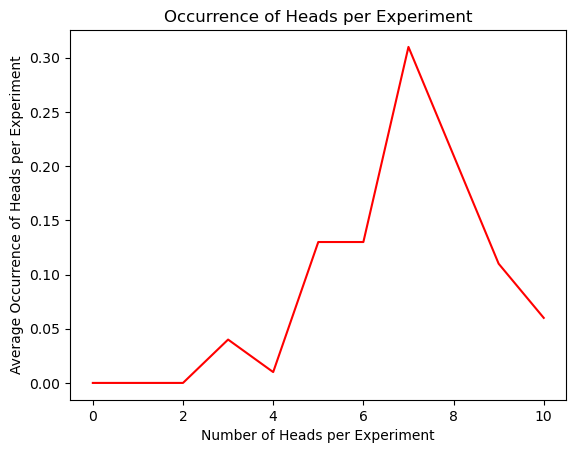

In [26]:
plt.plot(occurrence_list,'r')
plt.title("Occurrence of Heads per Experiment")
plt.xlabel('Number of Heads per Experiment')
plt.ylabel('Average Occurrence of Heads per Experiment')
plt.show()

### Test 2: Run 10000000 Times

The experiment was then changed to run the tests 10000000 times. The results of this experiment were o lot closer to the predicted values, and there was also slight variation between the results when the experiment was repeated. We can also see in the graph that the curve is a lot smoother rather than the sharp graph in test 1.

In [27]:
number_of_coin_flips_2 = 10
probability_2 = 0.7
trials_2 = 10000000
results_2 = experiment(number_of_coin_flips_2, probability_2, trials_2)

In [28]:
occurrence_list_2 = actual_occurrence(results_2, number_of_coin_flips_2)

In [29]:
print("Mean: ", results_2.mean())
print("Variance: ", results_2.var())
print("Standard deviation: ", results_2.std())
print("Occurrence of 7 heads out of 10: ", occurrence_list_2[7])

Mean:  7.0002002
Variance:  2.0998813599199613
Standard deviation:  1.449096739324177
Occurrence of 7 heads out of 10:  0.2668026


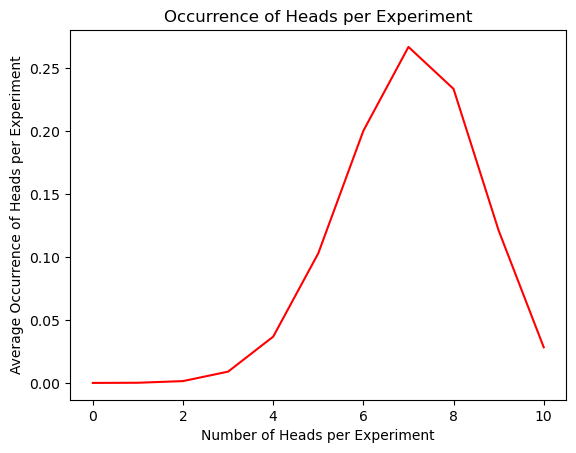

In [30]:
plt.plot(occurrence_list_2,'r')
plt.title("Occurrence of Heads per Experiment")
plt.xlabel('Number of Heads per Experiment')
plt.ylabel('Average Occurrence of Heads per Experiment')
plt.show()

### Test 3: Coin flipped 100 times. Experiment Ran 10000000 Times

For this test, the number of times the coin was flipped was changed to 100 times, and the experiment was run 10000000 times. Calculations for the predicted probabilities can be seen below. When calculating the factorial, the numbers were too large for my calculator. Hence, I wrote some functions to implement this.<br>
The outcome of this experiment was, as with the investigation for ten coin flips, an accurate representation of the predicted values. With this experiment, we can see that for a more significant number of tests, e.g. going from 10 coin flips to 100 coin flips, the resulting graph resembles a normal distribution.

#### For One Hundred Coin Flips
Expected value: $n*p = 100 * 0.7 = 70$<br>
Variance: $n*p * (1 - p) = 100 * 0.7 * 0.3 = 21$<br>
Standard deviation: $\sqrt{V} = \sqrt{21} = 4.58$<br>
probability of 70 heads out of 100: $p^{k} * (1 - p)^{n-k} = 0.7^{70} * (1 - 0.7)^{100 - 70} = 2.9546118995115305e^{-27}$<br>
number of outcomes with 70 heads: $n!/(k! * (n - k)!) = 100!/(70!*(100-70)!) = 2.9372339821610947e^{+25}$<br>
Total probability of 7 heads out of 10 = $2.9372339821610947e^{+25} * 2.9546118995115305e^{-27} = 0.08678386475342809$

In [31]:
def get_factorial(number):
    """
    AIM: Calculates the factorial of a number.
    ARGUMENTS: number: integer value.
    ACTION: Uses a for loop to calculate the factorial.
    RETURN: the factorial of the input number.
    """
    factorial = 1
    for i in range(1, number + 1):
        factorial *= i
    return factorial
        

In [32]:
def get_number_of_outcomes(n, k):
    """
    AIM: Calculates the number of ways k can be drawn from n. Where k is the sample size
         adn n is the total number of objects.
    ARGUMENTS: n: number of objects k: sample size.
    ACTION: implements the formula n!/(k! * (n - k)!)
    RETURN: The number of ways k can be chosen from n.
    """
    # Get the required factorials.
    n_fact = get_factorial(n)
    k_fact = get_factorial(k)
    n_minus_k_fact = get_factorial(n-k)
    
    # formula n!/(k! * (n - k)!)
    outcomes = n_fact / (k_fact * n_minus_k_fact)
    
    return outcomes

In [33]:
def prob_heads(p, n, k):
    """
    AIM: Calculates the probability of sample size k being chosen from n objects given p probability.
    ARGUMENTS: n: number of objects k: sample size p: probability.
    ACTION: implements the formula p^{k} * (1 - p)^{n-k}
    RETURN: The probability of choosing k from n.
    """
    # formula p^{k} * (1 - p)^{n-k}
    return (p**k) * (1-p)**(n-k)

In [34]:
outcomes_wit_70_heads = get_number_of_outcomes(100,70)
p_70_heads = prob_heads(0.7,100,70)
total_probability = outcomes_wit_70_heads * p_70_heads
print("Number of outcomes with 70 heads:", outcomes_wit_70_heads)
print("The probability of getting 70 heads:", p_70_heads)
print("Total probability of getting 70 heads out of 100:", total_probability)

Number of outcomes with 70 heads: 2.9372339821610947e+25
The probability of getting 70 heads: 2.9546118995115305e-27
Total probability of getting 70 heads out of 100: 0.08678386475342809


In [35]:
number_of_coin_flips_3 = 100
probability_3 = 0.7
trials_3 = 10000000
results_3 = experiment(number_of_coin_flips_3, probability_3, trials_3)

In [36]:
occurrence_list_3 = actual_occurrence(results_3, number_of_coin_flips_3)

In [37]:
print("Mean: ", results_3.mean())
print("Variance: ", results_3.var())
print("Standard deviation: ", results_3.std())
print("Occurrence of 70 heads out of 100: ", occurrence_list_3[70])

Mean:  69.9999641
Variance:  21.008486098711195
Standard deviation:  4.58350151071331
Occurrence of 70 heads out of 100:  0.0867522


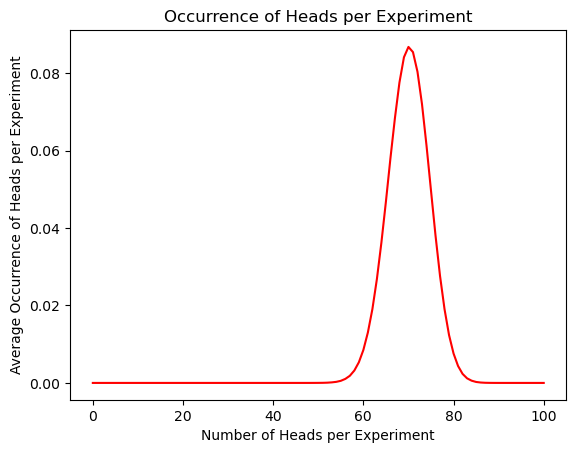

In [38]:
plt.plot(occurrence_list_3,'r')
plt.title("Occurrence of Heads per Experiment")
plt.xlabel('Number of Heads per Experiment')
plt.ylabel('Average Occurrence of Heads per Experiment')
plt.show()

## Reflection

The task was to calculate the expected value of a biased coin being heads if it is flipped several times. With a bias of 0.7, it would be expected that out of 10 coin flips, seven would be heads. However, the actual probability of getting seven heads out of 10 was calculated to be only 0.269. So if a coin is flipped ten times, it is not very likely to get 7 out of ten heads, even with a biased coin.<br>

An experiment to prove our calculations was developed to show that if the test to flip the coin ten times were carried out 100 times or 1000 times, the average of all results would be more likely to reflect our calculated values.<br>

The experiment was set up using two functions:<br>

Experiment: This function used the binomial method from NumPys random module. This method takes as arguments the number of trials to be carried out, the probability of success of each trial, and the number of times the trial should be repeated. The method outputs a NumPy array of the results of these trials. I packaged this method into a function to make it easier to reuse.<br> 

Actual_occurance: This method takes the experiment results and creates a list of the number of times a result occurred as a percentage of the whole. The percentage was represented as a decimal number between 0 and 1.<br>

Running the experiment:<br>

The experiment was first run 100 times. The results of this were close to the values predicted in my calculations. However, each time the experiment was run, there were significant variations in the results.<br> 

The experiment was then set up to be run 10000000 times. The results were much closer to the calculated values and there was far less variation between results each time the experiment was run. The graph for this experiment was also a lot smoother than the graph for the experiment run 100 times.<br>
Finally, the experiment was changed so the coin would be flipped 100 times for each trial rather than ten times. Calculations for this new experiment were completed before running the experiment. These calculations were more difficult due to the more significant numbers. My calculator could not calculate the factorial of these higher numbers, so I created a set of functions to do the calculations for me.<br> 
When this experiment was run, the results reflected the calculated values. The more interesting part of this experiment was the change to the graph, which now resembled a normal distribution graph with a continuous variable rather than binomial distribution with a discrete variable. 
